In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.figsize'] =  (8, 6)

In [10]:
def cAMP_PDEpt_tQSSA(t, x):
    cAMP, PDEpt = x

    numerator1 = cAMP * r1 * (-0.5 * Km2 + 0.5 * W0) + (-0.5 * cAMP * r1 - 0.5 * cAMP * r2 - 0.5 * Km1 * r2 - 0.5 * r2 * W0) * Dt
    denominator1 = cAMP * r1 - 1. * r2 * Dt

    numerator2 = cAMP ** 2 * r1 ** 2 * (Km2 ** 2 + 2. * Km2 * W0 + W0 ** 2) + cAMP * r1 * (cAMP * (2. * Km2 * r1 + 2. * Km2 * r2 + 2. * r1 * W0 - 2. * r2 * W0) + r2 * (2. * Km1 * Km2 - 2. * Km1 * W0 - 2. * Km2 * W0 - 2. * W0 ** 2)) * Dt + (cAMP ** 2 * (r1 ** 2 + 2. * r1 * r2 + r2 ** 2) + cAMP * r2 * (2. * Km1 * r1 + 2. * Km1 * r2 - 2. * r1 * W0 + 2. * r2 * W0) + r2 ** 2 * (Km1 ** 2 + 2. * Km1 * W0 + W0 ** 2)) * Dt ** 2
    denominator2 = (cAMP * r1 - 1. * r2 * Dt) ** 2

    ACpt = numerator1 / denominator1 - 0.5 * np.sqrt(numerator2 / denominator2)


    dcAMP = k1 * W0 * ACpt - (k2*PDEpt + k3) * cAMP
    dPDEpt = r3 * cAMP * ((W1 - PDEpt) / Km3 + cAMP + (W1 - PDEpt)) - r4 * Et * PDEpt / (Km4 + PDEpt + Et)

    return [dcAMP, dPDEpt]

In [11]:
k = 6
W0 = 6.57 #
W1 = 10
k1 = 1.09 /k
k3 = 3.5 /k #or 5.50
k2 = 5.25 /k# was good or 19

r1, r2, r3, r4 =  2.13 / k,  1.62 / k, 0.56 / k, 0.94 / k
Km1, Km2, Km3, Km4 = 1.401430143014302, 5, 5.1, 4.3
Dt =  3.116001600160016
Et = 1.5

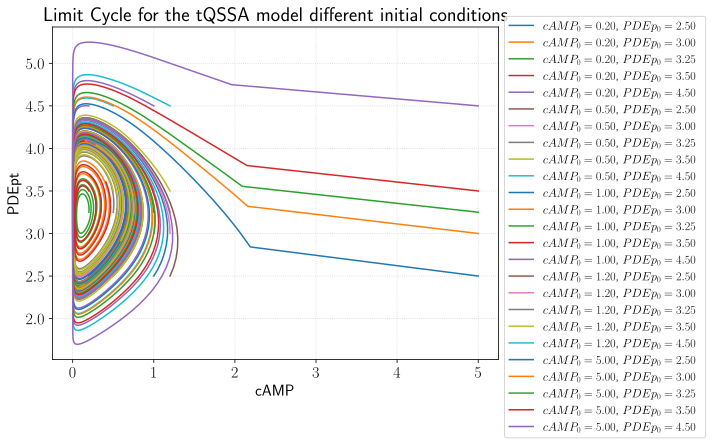

In [17]:
a = 0.1
b = 100
t = np.linspace(a, b,1000)

#cAMP_values = np.linspace(0, 1.5, 8)
cAMP_values = [0.2, 0.5, 1, 1.2, 5]
#PDEp_values = np.linspace(2.5, 325, 6)
PDEp_values = [2.5, 3, 3.25,  3.5, 4.5]

# plot the limit cycle for different initial conditions
for i, cAMP_0 in enumerate(cAMP_values): # loop over initial conditions for cAMP,  enumarate gives the index
    for j, PDEp_0 in enumerate(PDEp_values): # loop over initial conditions for PDEp,  enumerate gives the index
        sol = solve_ivp(cAMP_PDEpt_tQSSA, [a, b], [cAMP_0, PDEp_0], t_eval=t) # solve the ODE
        plt.plot(sol.y[0], sol.y[1], "-", label=rf"$cAMP_0={cAMP_0:.2f}$, $PDEp_0={PDEp_0:.2f}$")
plt.title('Limit Cycle for the tQSSA model different initial conditions')
plt.xlabel('cAMP')
plt.ylabel('PDEpt')
plt.grid(linestyle=':', color='lightgray')
plt.legend(bbox_to_anchor=(1, 1.05), fontsize=12)
plt.savefig('limit_cycle.png', dpi=300, bbox_inches='tight')
plt.show()